In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import monpa
import jieba.analyse
import codecs
from glob import glob
import nltk

+---------------------------------------------------------------------+
  Welcome to MONPA: Multi-Objective NER POS Annotator for Chinese
+---------------------------------------------------------------------+
已找到 model檔。Found model file.


In [2]:
files = glob('./疫苗接種/中時/*_cleaned.csv')

df = pd.concat((pd.read_csv(file, usecols = ['cleaned_text'], dtype = {'cleaned_text':str})for file in files), ignore_index = True)

df = df['cleaned_text']
df

0        國際 社會 助 全球 抗疫 傳 拜登 政府 擬 追加 輝瑞 莫德納 疫苖 分送 繼 傳出 美...
1        輝瑞 疫苗 分鐘 敏 美 醫 護送 加護 病房 曝光 美國 輝瑞大 藥廠 Pfizer 開發...
2        英 開打 疫苗 盼 生活 回歸 常態 英國 率先 開打 美國 藥廠 輝瑞 Pfizer 德國...
3        目標 單日 劑 指揮中心 派 協助 接種 力 拚 劑 疫苗 覆蓋率 流行 疫情 指揮中心 開...
4        全民 劑 疫苗 FDA 專家 否決 美國 總統 拜登 全民 接種 加強 劑 計畫 踢到 鐵板...
                               ...                        
38559    陳曦快 評 專屬 標籤 貼 鴻海 台積電 成功 買到 劑 BNT 疫苗 民進黨 瘋狂 搶功 ...
38560    觀念 平台 － 牛 走虎 壬寅 投資 方向 校 準確 立 快 尾聲 送走 牛年 迎接 虎年 ...
38561    雲林 少婦 疫苗 哺乳 女嬰次 猝死 檢擇期 解剖 雲林縣 蘇姓 媽媽 昨天 施打 AZ 疫...
38562    金門莫德納 疫苗 明天 開打 楊鎮浯 視察 接種 站 金門 獲 配發 莫德納 疫苗 劑 ／ ...
38563    國民黨 控 衛福部 高端 效期 國民黨 立院黨團 昨 開 記者會 指 衛福 部長 陳時中 日...
Name: cleaned_text, Length: 38564, dtype: object

In [3]:
df = df.values.tolist()
df[0]

'國際 社會 助 全球 抗疫 傳 拜登 政府 擬 追加 輝瑞 莫德納 疫苖 分送 繼 傳出 美國 額外 採購 輝瑞 新冠 肺炎 疫苖 助 全 世界 抗疫 消息 透露 美國 政府 正在 莫德納 Moderna 展開 擴大 疫苖 採購 協商 消息 指出 拜登 政府 擬 未來 全球 近 家 捐贈 支 輝瑞 新冠 肺炎 疫苖 周三 輝瑞 股價 逆勢 收漲 % 帶動 莫德納 收 漲 % 發言人 表示 公司 意願 美國政府 提供 新冠 肺炎 疫苖 援助 低 收入 國家 拒絕 相關 協商 發表 評論 消息 透露 美國政府 莫德納 討論 結果 輝瑞 採購 數量 差不多 消息 指出 美國 低 收入 國家 非洲聯盟 African Union 分發 支 新冠 疫苗 明年 配送 支 消息 透露 美國 總統 拜登料 周四 七 工業國集團 G7 領袖 峰會 宣布 美國 採購 劑 輝瑞 -BioNTech 新冠 肺炎 疫苗 透過 全球 疫苖 取得 機制 Covax 分發 出去 預計 明年 捐贈 低 收入 國家 非洲聯盟 知情 表示 輝瑞 疫苖 部分 非 營利 價格 購買 美國 政府 莫德納 採購 疫苖 交易 條款 目前 尚'

In [ ]:
df[0]

In [4]:
files = glob('./疫苗接種/自由/*_cleaned.csv')

df_free = pd.concat((pd.read_csv(file, usecols = ['cleaned_text'], dtype = {'cleaned_text':str})for file in files), ignore_index = True)

df_free = df_free['cleaned_text']
df_free

0       武漢 肺炎 疫苗 開打 疾管署 APP 追蹤 事件 國內 開始 接種 武漢 肺炎 疫苗 疾管...
1       美國 逾 例 快 開打 輝瑞 疫苗 美國 聯邦政府 配發 批 輝瑞 疫苗 十四 日 送往 醫...
2       COVAX 分配 首 批 近 劑 AZ 疫苗 抵 台 陳時中 宣布 COVAX 平台 採購 ...
3       桃醫 快 明天 恢復 營運 BNT 稱 供 台灣 疫苗 陳時中 : 流行 疫情 指揮中心 指...
4       效益 風險 鍾飲文 心血管 高 患者 建議 疫苗 高醫大 附設 醫院 院長 鍾飲文 表示 心...
                              ...                        
2055    追求 清零 陳時中 現階段 社區 安全 防疫 策略 追求 清零 病毒 共存 陳時中今 表示 ...
2056    春節 班機 楊鎮浯 啟動 金門 機場 快篩 難度 疫情 嚴峻 金門 頻 聲音 反映 盼 機場...
2057    學測 日 登場 防疫 措施 學測 二十一日 登場 教育部 表示 級 警戒 期間 指考 高 防...
2058    高中職 校園 / 暫停 開放 禁止 外人 入校 疫情 升溫 盧秀燕 宣佈 二日 高中職 校園...
2059    富邦產 防疫 保單 停止 收件 明天 新 保單 富邦 產險 表示 基於 風險 政策 維持 公...
Name: cleaned_text, Length: 2060, dtype: object

In [5]:
df_free = df_free.values.tolist()
df_free[0]

'武漢 肺炎 疫苗 開打 疾管署 APP 追蹤 事件 國內 開始 接種 武漢 肺炎 疫苗 疾管署 參考 美國 作法 融入 居家 檢疫 關懷 概念 APP 監測 系統 雙向 簡訊 追蹤 接種 身體 狀況 圖 牛津 AZ 疫苗 路透 資料照 〔 〕 國內 開始 接種 武漢 肺炎 疫苗 偵測 接種 事件 疾管署 參考 美國 作法 融入 居家 檢疫 關懷 概念 Taiwan V-Watch APP 監測 系統 透過 雙向 簡訊 追蹤 接種 身體 狀況 批 牛津 AZ 疫苗 日 運抵 台灣 衛生 福利部 食品 藥物 進行 檢驗 封緘 截至 通過 項 檢驗 菌 試驗 合格 放行 提供 全 台 家 武漢 肺炎 冠狀 病毒 疾病 COVID - 責任 醫療院 高 風險 醫事 優先 接種 繼續 閱讀 ... 衛生 福利部 疾病管制署 武漢 肺炎線 研討會 疾管署 急性 傳染病組長 楊靖慧 透露 階段 接種 計畫 預計 啟動 屆時 醫事人員 預約 接種 名冊 勾稽 安排 接種 接種 疫苗 伴隨 事件 全球 關注 焦點 楊靖慧 避免 疫苗 事件 發生 建議 疫苗 民眾 避免 接種 醫院 須 設置 休息區 準備 急救 設備 接種 民眾 留在 現場 觀察 分鐘 流行 疫情 指揮中心 發言人 莊人祥 受 訪 未來 醫療院 遇到 接種 反應 事件 流感 疫苗 通報 食藥署 全 國 藥物 反應 通報 系統 通報 疾管署 疫苗 接種 事件 通報 系統 逐一 關懷 否 需要 通報 預防 接種 受害 救濟 接受 通報 疾管署 規劃 疫苗 取得 緊急 授權 EUA 持續 追蹤 接種 民眾體 抗體 狀況 副 作用 參考 美國 作法 設置 Taiwan V-Watch APP 關懷 居家 檢疫 模式 透過 雙向 簡訊 追蹤 前 名 接種 身體 狀況 持續 運用 科技 防疫 感染科 教授級 主治 醫師 黃玉成 表示 美國 早 疫苗 開始 接種 推出 V-Safe 系統 接種 主動 回報 事件 數百萬 名 美國 民眾 加入 通報 行列 根據 美國 統計 接種 劑 輝瑞 BNT 疫苗 發燒 約 % 劑 莫德納 發燒 約 % 未 監測到 疫苗 相關 反應 重症 症狀 反應 方面 BNT 接種 劑 約 莫德納 早期 百萬 劑 低 附設醫院 感染 副院長 黃高彬 接受 記者 電訪 聽到 海外 親友 分享 接種 疫苗 容易

In [6]:
df_free[0]

str

## 中時的去贅字與文字雲

In [6]:
import nltk
all_china = []
word = []
stop_word = ['%','...','〕','〔', '-', '助', '傳', '劑', '日', '歲', '％', '天', '前', '例', '新', '高', '全',
            ')', '沒', '(', '國', '周', '點', '僅', '快', '約', '台', '月', '名', '應', '未', '類', '請', '外',
            '家', '元', '先', '萬', '批', '元', '外', '先', '昨', '家', '期', '外', '目前', '現在', '認為', '顯示',
            '提供', '發現', '應該', '希望', '建議', '完成', '網友', '需要', '受', '表示']

for i in range(len(df)):
    word = df[i].split(' ')
    for j in range(len(word)):
         if word[j] not in stop_word:
            all_china.append(word[j])
all_china

['國際',
 '社會',
 '全球',
 '抗疫',
 '拜登',
 '政府',
 '擬',
 '追加',
 '輝瑞',
 '莫德納',
 '疫苖',
 '分送',
 '繼',
 '傳出',
 '美國',
 '額外',
 '採購',
 '輝瑞',
 '新冠',
 '肺炎',
 '疫苖',
 '世界',
 '抗疫',
 '消息',
 '透露',
 '美國',
 '政府',
 '正在',
 '莫德納',
 'Moderna',
 '展開',
 '擴大',
 '疫苖',
 '採購',
 '協商',
 '消息',
 '指出',
 '拜登',
 '政府',
 '擬',
 '未來',
 '全球',
 '近',
 '捐贈',
 '支',
 '輝瑞',
 '新冠',
 '肺炎',
 '疫苖',
 '周三',
 '輝瑞',
 '股價',
 '逆勢',
 '收漲',
 '帶動',
 '莫德納',
 '收',
 '漲',
 '發言人',
 '公司',
 '意願',
 '美國政府',
 '新冠',
 '肺炎',
 '疫苖',
 '援助',
 '低',
 '收入',
 '國家',
 '拒絕',
 '相關',
 '協商',
 '發表',
 '評論',
 '消息',
 '透露',
 '美國政府',
 '莫德納',
 '討論',
 '結果',
 '輝瑞',
 '採購',
 '數量',
 '差不多',
 '消息',
 '指出',
 '美國',
 '低',
 '收入',
 '國家',
 '非洲聯盟',
 'African',
 'Union',
 '分發',
 '支',
 '新冠',
 '疫苗',
 '明年',
 '配送',
 '支',
 '消息',
 '透露',
 '美國',
 '總統',
 '拜登料',
 '周四',
 '七',
 '工業國集團',
 'G7',
 '領袖',
 '峰會',
 '宣布',
 '美國',
 '採購',
 '輝瑞',
 '-BioNTech',
 '新冠',
 '肺炎',
 '疫苗',
 '透過',
 '全球',
 '疫苖',
 '取得',
 '機制',
 'Covax',
 '分發',
 '出去',
 '預計',
 '明年',
 '捐贈',
 '低',
 '收入',
 '國家',
 '非洲聯盟',
 '知情',
 '輝瑞',
 '疫苖',
 '部分',
 '非',


In [7]:
fdist = nltk.FreqDist(all_china)
fdist.most_common(30)

[('疫苗', 360153),
 ('接種', 112305),
 ('施打', 66597),
 ('疫情', 56902),
 ('台灣', 48350),
 ('AZ', 46901),
 ('民眾', 39194),
 ('高端', 38236),
 ('政府', 37745),
 ('莫德納', 37646),
 ('BNT', 37149),
 ('美國', 31616),
 ('新冠', 30404),
 ('病毒', 27567),
 ('防疫', 26948),
 ('預約', 25440),
 ('指出', 25392),
 ('沒有', 25202),
 ('指揮中心', 23015),
 ('陳時中', 21568),
 ('國家', 20775),
 ('開放', 18665),
 ('輝瑞', 16319),
 ('全球', 16270),
 ('國際', 16228),
 ('出現', 16005),
 ('採購', 15351),
 ('進行', 15168),
 ('感染', 14226),
 ('肺炎', 14017)]

In [9]:
stopwords = {}.fromkeys([")","(","●","+"])

In [17]:
import imageio.v2 as imagoio
back_color = imageio.imread('./KDL-60-1000.jpeg')

/var/folders/43/x96pj9hx1s7cfdnqf0g86k_m0000gn/T/ipykernel_11781/3466163229.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  back_color = imageio.imread('./KDL-60-1000.jpeg')


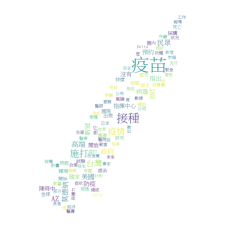

<Figure size 1000x600 with 0 Axes>

In [18]:
def generate_wordcloud(keywords, stopwords, file_path):
    wc = WordCloud(font_path = "./TW-Sung-98_1.ttf",
                   background_color = "white",
                   mask = back_color,
                   max_words = 100, stopwords = stopwords,
                   width=2000, height=1200)
    
    wc.generate_from_frequencies(keywords)
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize = (10, 6), dpi = 100)
    plt.show()
    wc.to_file('./文字雲/疫苗接種_中時_new.jpg')

generate_wordcloud(fdist, stopwords, "./selft_wordcloud1.jpg")

## 自由的去贅字與文字雲

In [19]:
all_free = []
word_free = []
stop_word = ['%','...','〔','〕', '-', 'APP', '圖', '批', '日', '項', '菌', '全', '台', '家', '劑', '／', '點',
            '歲', '現在', '請', '活動', '搶', '辦法', '保證', '抽', '閱讀', '表示', '新聞', '報導', '繼續', '相關',
            '提供', '目前', '預約', '記者', '目前', '指出', '掌握', '天天中獎', '例', '訊息', '前', '專區', '天', 
            '帶', '名', '國', '沒有', '約', '進行', '綜合', '出現', '％', '完成', '宣布', '高', '月', '未', '新', 
            '僅', '達', '資料', '快', '共', '昨', '站', '/', '昨天', '共', '站', '應','攝', '僅', '昨', '期', 
            '首', '攝', '首', '／', '達', '萬','首', '快', '天天', '站', '針對', '共', '僅', '昨', '資料', '完整',
            '持續', '期', '希望', '昨天', '元', '顯示', '問題', '公布', '/', '/', '達','快', '站', '共','應',
            '路透', '強調', '元', '開放', '攝','天天', '昨', '應', '顯示', '昨天', '/', '/', '／', '共', '達']

for i in range(len(df_free)):
    word_free = df_free[i].split(' ')
    for j in range(len(word_free)):
         if word_free[j] not in stop_word:
            all_free.append(word_free[j])
all_free

['武漢',
 '肺炎',
 '疫苗',
 '開打',
 '疾管署',
 '追蹤',
 '事件',
 '國內',
 '開始',
 '接種',
 '武漢',
 '肺炎',
 '疫苗',
 '疾管署',
 '參考',
 '美國',
 '作法',
 '融入',
 '居家',
 '檢疫',
 '關懷',
 '概念',
 '監測',
 '系統',
 '雙向',
 '簡訊',
 '追蹤',
 '接種',
 '身體',
 '狀況',
 '牛津',
 'AZ',
 '疫苗',
 '資料照',
 '國內',
 '開始',
 '接種',
 '武漢',
 '肺炎',
 '疫苗',
 '偵測',
 '接種',
 '事件',
 '疾管署',
 '參考',
 '美國',
 '作法',
 '融入',
 '居家',
 '檢疫',
 '關懷',
 '概念',
 'Taiwan',
 'V-Watch',
 '監測',
 '系統',
 '透過',
 '雙向',
 '簡訊',
 '追蹤',
 '接種',
 '身體',
 '狀況',
 '牛津',
 'AZ',
 '疫苗',
 '運抵',
 '台灣',
 '衛生',
 '福利部',
 '食品',
 '藥物',
 '檢驗',
 '封緘',
 '截至',
 '通過',
 '檢驗',
 '試驗',
 '合格',
 '放行',
 '武漢',
 '肺炎',
 '冠狀',
 '病毒',
 '疾病',
 'COVID',
 '責任',
 '醫療院',
 '風險',
 '醫事',
 '優先',
 '接種',
 '衛生',
 '福利部',
 '疾病管制署',
 '武漢',
 '肺炎線',
 '研討會',
 '疾管署',
 '急性',
 '傳染病組長',
 '楊靖慧',
 '透露',
 '階段',
 '接種',
 '計畫',
 '預計',
 '啟動',
 '屆時',
 '醫事人員',
 '接種',
 '名冊',
 '勾稽',
 '安排',
 '接種',
 '接種',
 '疫苗',
 '伴隨',
 '事件',
 '全球',
 '關注',
 '焦點',
 '楊靖慧',
 '避免',
 '疫苗',
 '事件',
 '發生',
 '建議',
 '疫苗',
 '民眾',
 '避免',
 '接種',
 '醫院',
 '須',
 '設置',
 '休息區',
 '準備',
 '急救',
 '

In [20]:
fdist = nltk.FreqDist(all_free)
fdist.most_common(30)

[('疫苗', 21205),
 ('接種', 8333),
 ('施打', 3612),
 ('AZ', 3140),
 ('肺炎', 3117),
 ('武漢', 3029),
 ('莫德納', 2763),
 ('疫情', 2361),
 ('BNT', 2203),
 ('美國', 2092),
 ('民眾', 2009),
 ('台灣', 1881),
 ('輝瑞', 1722),
 ('COVID', 1651),
 ('病毒', 1433),
 ('高端', 1428),
 ('指揮中心', 1378),
 ('政府', 1373),
 ('冠狀', 1212),
 ('防疫', 1133),
 ('國家', 1122),
 ('新型', 1067),
 ('確診', 1000),
 ('陳時中', 954),
 ('病毒病', 928),
 ('研究', 922),
 ('英國', 903),
 ('台北', 833),
 ('感染', 702),
 ('公司', 699)]

In [21]:
stopwords = {}.fromkeys([")","(","+"])

In [26]:
back_color = imageio.imread('./syringe_3ml_bd-2000x2000.jpeg')

/var/folders/43/x96pj9hx1s7cfdnqf0g86k_m0000gn/T/ipykernel_11781/2334856944.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  back_color = imageio.imread('./syringe_3ml_bd-2000x2000.jpeg')


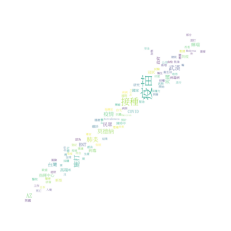

<Figure size 1000x600 with 0 Axes>

In [27]:
def generate_wordcloud(keywords, stopwords, file_path):
    wc = WordCloud(font_path = "./TW-Sung-98_1.ttf",
                   background_color = "white",
                   mask = back_color,
                   max_words = 100, stopwords = stopwords,
                   width=2000, height=1200)
    
    wc.generate_from_frequencies(keywords)
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize = (10, 6), dpi = 100)
    plt.show()
    wc.to_file('./文字雲/疫苗接種_自由_new.jpg')

x = generate_wordcloud(fdist, stopwords, "./selft_wordcloud1.jpg")